**Imports**

In [2]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from typing import Tuple

import seaborn as sns

# Goggle
from goggle.GoggleModel import GoggleModel

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader

/home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


**Load data**

In [4]:
dataset = "covertype"
X = pd.read_csv("../data/covtype.data", header=None)

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc(54)]
col_list = X.columns[ind]
ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5.0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5.0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2.0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5.0


**Fit model**

In [5]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=16,
    decoder_l=2,
    threshold=0.1,
    decoder_arch="gcn",
    graph_prior=None,
    prior_mask=None,
    device="cpu",
    beta=1,
    learning_rate=0.01,
    seed=42,
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=55, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=55, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=55, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=16, out=8, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=8, out=1, normalization=both, activation=None)
    )
  )
)

In [6]:
gen.fit(X_train)

**Evaluate synthetic data**

In [17]:
X_synth = gen.sample(X_test)
X_synth.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.676125,-0.506399,-0.133887,-0.937621,-0.264094,-0.048315,1.398966,0.491509,-0.371848,0.693813,0.105182,-0.236473,-0.476732,-0.187326,1.0
1,-0.148971,1.540592,0.502657,1.325021,0.072333,0.803828,0.342102,0.491509,-0.371848,0.693813,0.190001,-0.212688,-0.076215,-0.156437,1.0
2,0.097184,2.905252,0.903989,1.435578,0.684941,-0.048315,-0.947575,1.306701,-0.371848,0.693813,-0.264124,-0.030708,-0.789819,-0.318254,1.0
3,1.144712,1.540592,-0.651200,1.544298,-0.072100,0.803828,-1.089899,0.491509,-0.371848,0.693813,1.019420,-0.295139,-0.596431,-0.189798,1.0
4,1.234457,1.540592,-1.297503,1.678617,2.481732,-0.900458,-1.203377,0.491509,-0.371848,0.693813,-0.347688,-0.419736,0.830776,0.768000,0.0


In [18]:
X_synth_loader = GenericDataLoader(
    X_synth,
    target_column="income",
)
X_test_loader = GenericDataLoader(
    X_test,
    target_column="income",
)

res = gen.evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {(res[1][0] - res[1][1]):.3f}"
)

**Generate TSNE plots**

In [19]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", "income"], axis=1)

In [20]:
tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

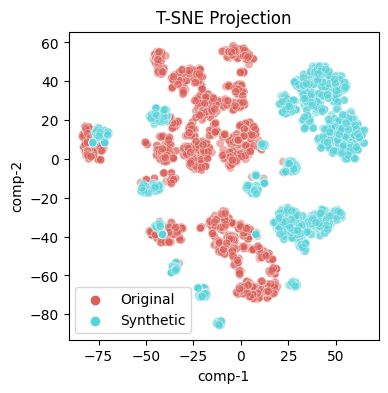

In [21]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()

**Visualise adjacency matrix**

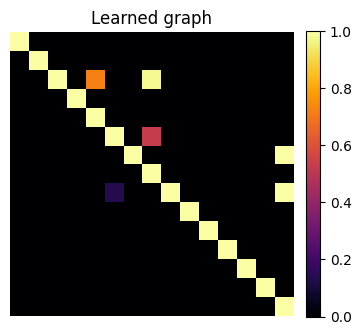

In [14]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap="inferno", interpolation="nearest", vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title("Learned graph")
plt.axis("off")
plt.show()